<a href="https://colab.research.google.com/github/rambadade32/Citrurs_Disease_Detection/blob/main/Citrus_Disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Feb  1 15:35:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   8827MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!unzip "/content/drive/MyDrive/documents/archive (1).zip" -d"/content/drive/MyDrive/dataset"

# Leaf Disease Detection using CNN



In this project we're going to be using machine learning to help us identify different categories of Disease the plant have.

To do this, currently we'll be using data from the [Kaggle ](https://www.kaggle.com) (and once our database  gets generated we'll integrate it with our this notebook.)The kaggle dataset is consists of a collection of 400+ images of
4 different citrus diseases.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify four citrus Diseases. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in atuomatically adding information to their listings.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:
1. Get data ready (download from Kaggle, store, import).
2. Prepare the data (preprocessing, the 3 sets, X & y).
3. Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub. 

The process of using a pretrained model and adapting it to your own problem is called **transfer learning**. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

## Getting our workspace ready

## Getting Data Ready


## Importing the required libraries 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub
print(hub.__version__)
from keras.preprocessing.image import ImageDataGenerator

0.11.0


### Accessing data
we're accessing the data as we've already unzipped the zip file,we've :
1. train and test dataset but we don't have validation dataset.
2. Data insufficiency
3. we'll look at the image features(like size,channels)
lets make the directories to train and test data paths


In [ ]:
train_dir = "drive/MyDrive/dataset/train"
test_dir = "drive/MyDrive/dataset/test"

## Data preprocessing and Data Augumentation

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.2,horizontal_flip=True,
                                 rescale = 1./255,
                                 shear_range=0.2,
                                 validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

## Data Splitting
usually we split our data into `Training set`,`Validation set`and`Test set`.


Here we already have trin and test sets so we'll split our training dataset into validation dataset

In [ ]:
IMG_SIZE = 224
path = "drive/MyDrive/dataset/val_set"
train_data = train_datagen.flow_from_directory(train_dir,target_size=(IMG_SIZE,IMG_SIZE),
                                               shuffle = True,
                                               seed=0,save_format ='png',
                                               subset ='training')
val_data = train_datagen.flow_from_directory(train_dir,target_size=(IMG_SIZE,IMG_SIZE),
                                             shuffle = False,
                                             subset = 'validation',
                                             )

Found 381 images belonging to 4 classes.
Found 94 images belonging to 4 classes.


In [ ]:
# Preprocessed test data of perticular format and shape
test_data = test_datagen.flow_from_directory(test_dir,target_size=(IMG_SIZE,IMG_SIZE),
                                             shuffle = False,
                                             )

Found 121 images belonging to 4 classes.


In [ ]:
train_data.class_indices

In [ ]:
type(train_data.class_indices)

dict

In [ ]:
#Types of diseases unique labels
Diseases = []

x = train_data.class_indices
for name, i in x.items():
    Diseases.append(name)

Diseases

['blackspot', 'canker', 'greening', 'healthy']

([<matplotlib.patches.Wedge at 0x7f343848ecc0>,
 [Text(-0.466047474462653, 0.9963933718903307, 'Trainig Data'),
  Text(-0.23875956678192126, -1.1760075974542468, 'Validation Data'),
  Text(0.9640844049995276, -0.7145217001860105, 'Test Data')],
 [Text(-0.25420771334326525, 0.5434872937583621, '63.9%'),
  Text(-0.13927641395612073, -0.6860044318483105, '15.8%'),
  Text(0.5623825695830578, -0.41680432510850607, '20.3%')])

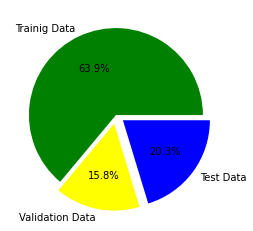

In [ ]:
val =[len(train_data.filenames),
len(val_data.filenames),
len(test_data.filenames)]

label=['Trainig Data','Validation Data','Test Data']
colours = ["green",'yellow','blue']
plt.pie(x=val,labels=label,colors=colours,explode=(0,0.1,0.1),autopct="%1.1f%%");
plt.title('Data Splitting');

### see some images


In [ ]:

from IPython.display import Image,display

def show_image(filepath):
   
   for i in range(2):
  
        im = Image("/content/drive/MyDrive/dataset/train/"+filepath[i])
     
        print(filepath[i])

        display(im)

blackspot/b (165).png


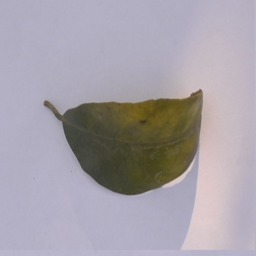

blackspot/b (166).png


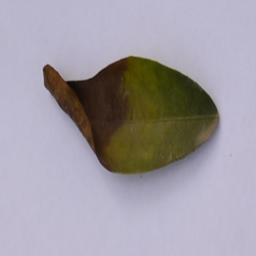

In [ ]:
show_image(train_data.filenames)

greening/g (10).png


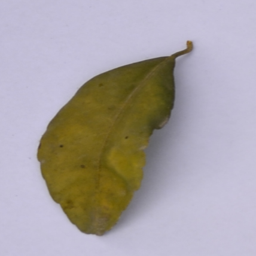

greening/g (100).png


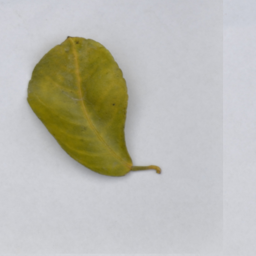

In [ ]:
show_image(val_data.filenames[54:56])

## Creating a model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(Diseases) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
OUTPUT_SHAPE

4

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=["accuracy"] 
  )

  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4008      
Total params: 5,436,721
Trainable params: 4,008
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
def tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/vgg/logs",datetime.datetime.now().strftime("%Y%m%D-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/callback'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/dataset/logs'),
]

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  #tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=100,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=my_callbacks)
  
  return model

In [ ]:
#model = train_model()

In [ ]:
#function to save a model
import os
import datetime
def save_model(model,suffix=None):
  model_dir = os.path.join("drive/MyDrive/dataset/models",
                            datetime.datetime.now().strftime("%Y%m%D-%H%M%S"))
  model_path = model_dir + suffix +".h5"
  model.save(model_path)
  print (f"saving model at {model_path}...")
  return model_path

In [ ]:
#function to load a model

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#model.save("/content/drive/MyDrive/dataset/models/cit.h5")
#save_model(model=model,citrus)

In [ ]:
model = load_model("/content/drive/MyDrive/dataset/models/cit.h5")

Loading saved model from: /content/drive/MyDrive/dataset/models/cit.h5


In [ ]:
model.evaluate(val_data,verbose = 1)

3/3 [==============================] - 4s 1s/step - loss: 0.4744 - accuracy: 0.8191


[0.47444623708724976, 0.8191489577293396]

## Validation Prediction

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return Diseases[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(vpred[25])
pred_label

'blackspot'

In [ ]:
def get_label(prediction_probabilities):
   '''
   takes numpy array and returns label of highest probability
   '''
   return  Diseases[np.argmax(prediction_probabilities)]

In [ ]:
val_image_labels = []
val_image = []
for i in range(len(val_data.filenames)):
  val_image_labels.append(val_data.filenames[i])
  val_image.append("drive/MyDrive/dataset/train/"+val_data.filenames[i])

In [ ]:
val_image_labels[0]

'blackspot/74.jpg'

In [ ]:
val_image[0:10]

['drive/MyDrive/dataset/train/blackspot/74.jpg',
 'drive/MyDrive/dataset/train/blackspot/78.jpg',
 'drive/MyDrive/dataset/train/blackspot/b (11).png',
 'drive/MyDrive/dataset/train/blackspot/b (126).png',
 'drive/MyDrive/dataset/train/blackspot/b (131).png',
 'drive/MyDrive/dataset/train/blackspot/b (134).png',
 'drive/MyDrive/dataset/train/blackspot/b (139).png',
 'drive/MyDrive/dataset/train/blackspot/b (14).png',
 'drive/MyDrive/dataset/train/blackspot/b (140).png',
 'drive/MyDrive/dataset/train/blackspot/b (142).png']

In [ ]:
#vpred=model.predict(val_data,verbose=1)

In [ ]:
#val_preds = np.save("drive/MyDrive/Val_preds_1",vpred)

In [ ]:
val_preds = np.load("drive/MyDrive/Val_preds_1.npy")

In [ ]:
len(val_preds)

94

In [ ]:
vpred.shape

(94, 4)

In [ ]:
vpred.dtype

dtype('float32')

In [ ]:
len(np.round(vpred))

In [ ]:
val_data.class_indices

{'blackspot': 0, 'canker': 1, 'greening': 2, 'healthy': 3}

In [ ]:
# First prediction
print(vpred[0])
print(f"Max value (probability of prediction): {np.max(vpred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(vpred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(vpred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {Diseases[np.argmax(vpred[0])]}") # the predicted label

[0.4311049  0.37357295 0.19406855 0.00125356]
Max value (probability of prediction): 0.4311048984527588
Sum: 0.9999999403953552
Max index: 0
Predicted label: blackspot


In [ ]:
val_image[0]

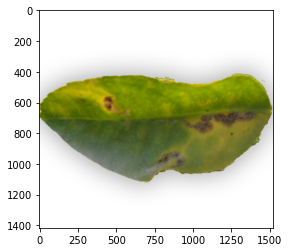

In [ ]:
val_data[0]

## Test Predictions

In [ ]:
labels=[]

for i in range(len(test_data.labels)):
    labels.append(test_data.labels[i])

true_labels=[]
for i in range(len(test_data.labels)):
  true_labels.append(Diseases[labels[i]])

In [ ]:
true_labels[0:3]

['blackspot', 'blackspot', 'blackspot']

In [ ]:
len(Diseases)

4

In [ ]:
img = ["/content/drive/MyDrive/dataset/test/"+fname for fname in test_data.filenames]
img[:3]

['/content/drive/MyDrive/dataset/test/blackspot/b (250).png',
 '/content/drive/MyDrive/dataset/test/blackspot/b (251).png',
 '/content/drive/MyDrive/dataset/test/blackspot/b (252).png']

In [ ]:
#test_predictions = model.predict(test_data,verbose=1)
test_predictions = np.save("/content/drive/MyDrive/test_prediction.npy",test_predictions)